In [ ]:
#PCA for flight efficiency value 

Variance explained by PCA: [0.50088194]


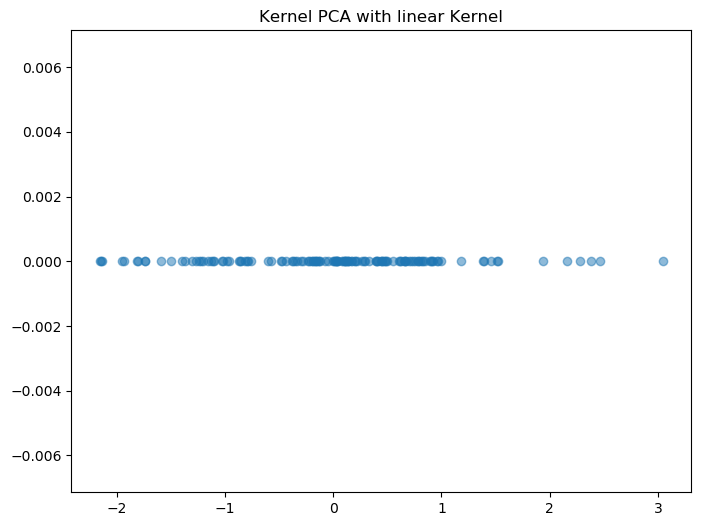

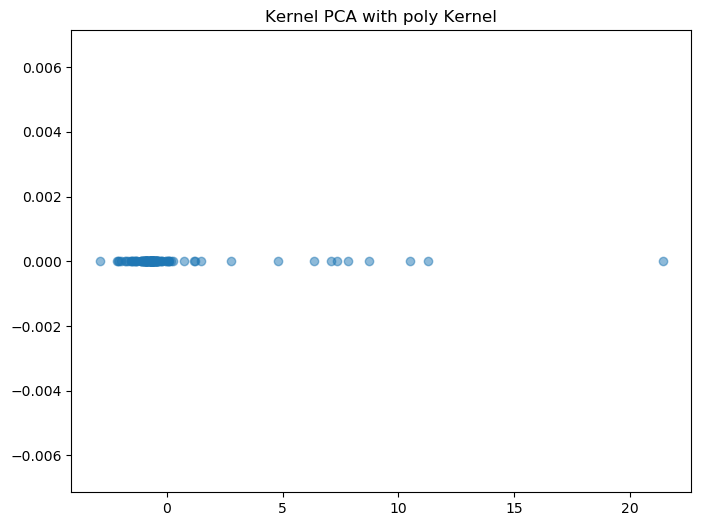

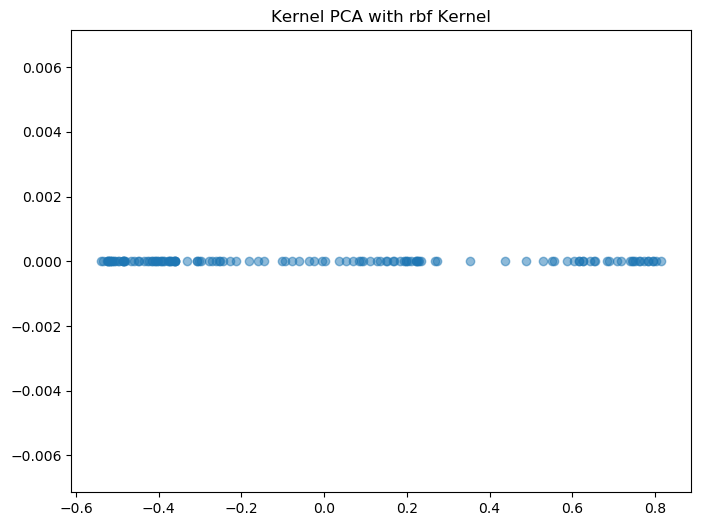

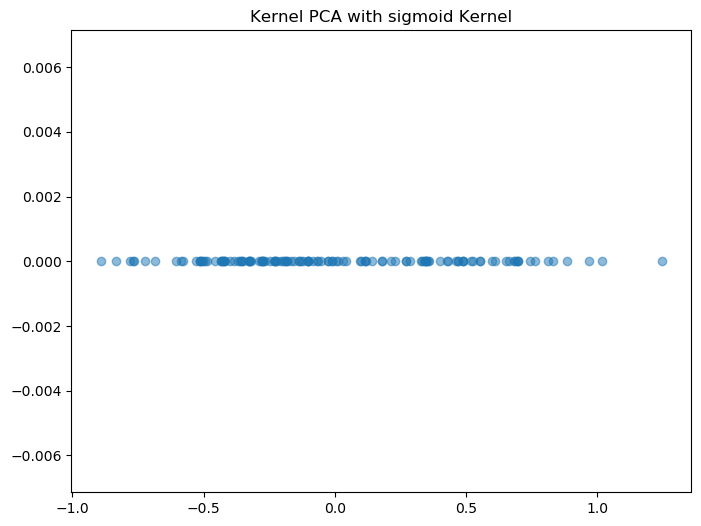

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load the data
filename = 'D:/ATMRI/F450 case store/DASC/F450 flight test record-process_FE.csv'  # replace with your file name
df = pd.read_csv(filename)

# specify the features to use
features = ['FT/volt', 'FC/volt']  # replace with your actual column names

# standardize the features to have mean=0 and variance=1
scaler = StandardScaler().fit(df[features])
scaled_features = scaler.transform(df[features])

# perform PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(scaled_features)
print('Variance explained by PCA:', pca.explained_variance_ratio_)

# save the first PC to the dataframe and write it back to the CSV
df['FE_PCA'] = pca_result
df.to_csv(filename, index=False)

# perform Kernel PCA with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    kpca = KernelPCA(n_components=1, kernel=kernel)
    kpca_result = kpca.fit_transform(scaled_features)
    
    # save the first PC to the dataframe and write it back to the CSV
    df['FE_KPCA_{}'.format(kernel)] = kpca_result
    df.to_csv(filename, index=False)
    
    # plot the Kernel PCA result
    plt.figure(figsize=(8,6))
    plt.scatter(kpca_result, np.zeros_like(kpca_result), alpha=0.5)
    plt.title('Kernel PCA with {} Kernel'.format(kernel))
    plt.show()


Variance explained by PCA: [0.63541823]
Approximate variance explained by Kernel PCA with linear kernel: [1.]


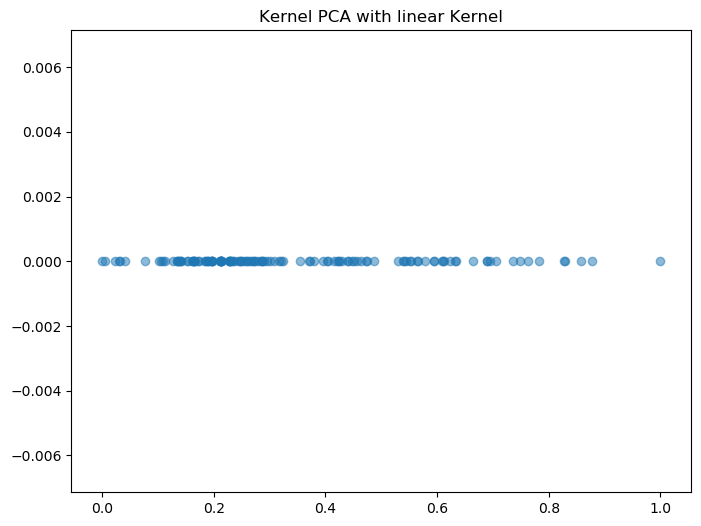

Approximate variance explained by Kernel PCA with poly kernel: [1.]


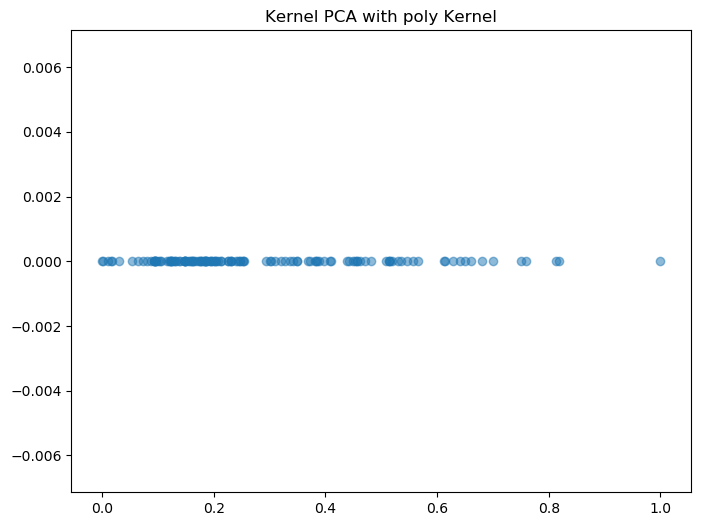

Approximate variance explained by Kernel PCA with rbf kernel: [1.]


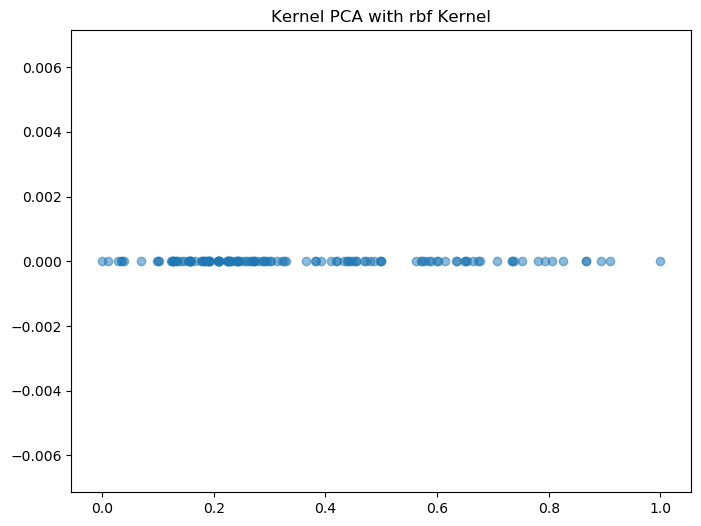

Approximate variance explained by Kernel PCA with sigmoid kernel: [1.]


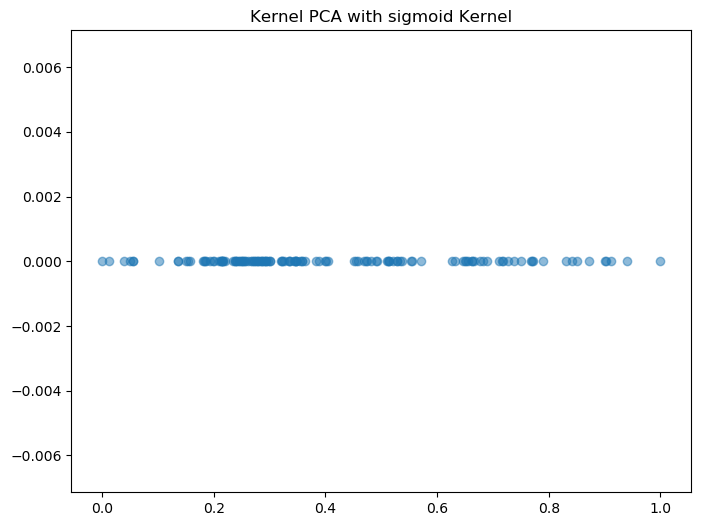

The Kernel PCA model with the highest approximate explained variance uses the linear kernel.


In [1]:
#min max
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# load the data
filename = 'D:/ATMRI/F450 case store/DASC/F450 flight test record-process_FE-2.csv'  # replace with your file name
df = pd.read_csv(filename)

# specify the features to use
features = ['FT/volt', 'FC/volt']  # replace with your actual column names

# scale the features to range 0-1
scaler = MinMaxScaler().fit(df[features])
scaled_features = scaler.transform(df[features])

# perform PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(scaled_features)

# Scale the PCA result to 0-1
pca_result_scaler = MinMaxScaler().fit(pca_result)
pca_result_scaled = pca_result_scaler.transform(pca_result)

explained_variance_pca = pca.explained_variance_ratio_
print('Variance explained by PCA:', explained_variance_pca)

# save the first PC to the dataframe and write it back to the CSV
df['FE_PCA_Scaled'] = pca_result_scaled
df.to_csv(filename, index=False)

# perform Kernel PCA with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
explained_variances_kpca = {}
for kernel in kernels:
    kpca = KernelPCA(n_components=1, kernel=kernel)
    kpca_result = kpca.fit_transform(scaled_features)

    # Scale the Kernel PCA result to 0-1
    kpca_result_scaler = MinMaxScaler().fit(kpca_result)
    kpca_result_scaled = kpca_result_scaler.transform(kpca_result)

    # save the first PC to the dataframe and write it back to the CSV
    df['FE_KPCA_Scaled_{}'.format(kernel)] = kpca_result_scaled
    df.to_csv(filename, index=False)
    
    # compute and store explained variance for Kernel PCA
    pca_temp = PCA(n_components=1).fit(kpca_result_scaled)
    explained_variance_kpca = pca_temp.explained_variance_ratio_
    explained_variances_kpca[kernel] = explained_variance_kpca
    print('Approximate variance explained by Kernel PCA with {} kernel: {}'.format(kernel, explained_variance_kpca))
    
    # plot the Kernel PCA result
    plt.figure(figsize=(8,6))
    plt.scatter(kpca_result_scaled, np.zeros_like(kpca_result_scaled), alpha=0.5)
    plt.title('Kernel PCA with {} Kernel'.format(kernel))
    plt.show()

# Find and print the kernel with the highest explained variance
best_kernel = max(explained_variances_kpca, key=explained_variances_kpca.get)
print('The Kernel PCA model with the highest approximate explained variance uses the {} kernel.'.format(best_kernel))


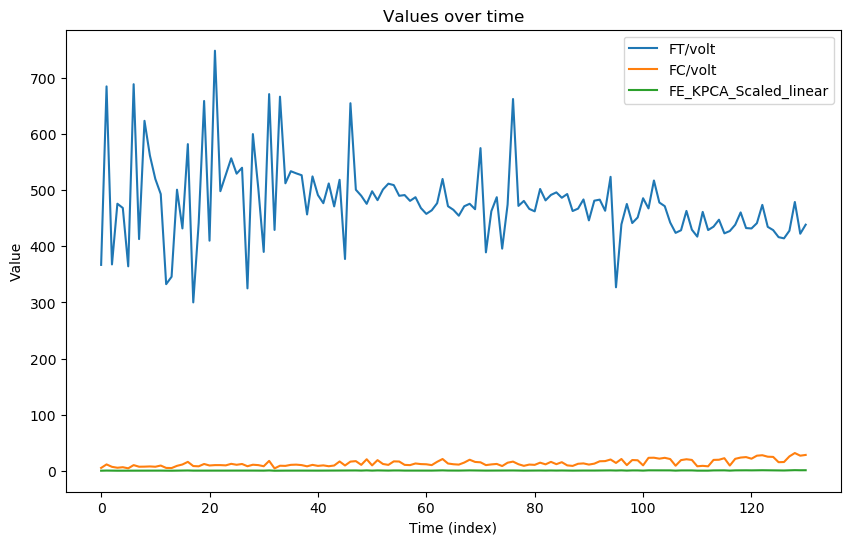

In [2]:
# Plot 'FT/volt' values
plt.figure(figsize=(10,6))
plt.plot(df['FT/volt'].values, label='FT/volt')
plt.plot(df['FC/volt'].values, label='FC/volt')
plt.plot(df['FE_KPCA_Scaled_linear'].values, label='FE_KPCA_Scaled_linear')
plt.legend()
plt.title('Values over time')
plt.xlabel('Time (index)')
plt.ylabel('Value')
plt.show()

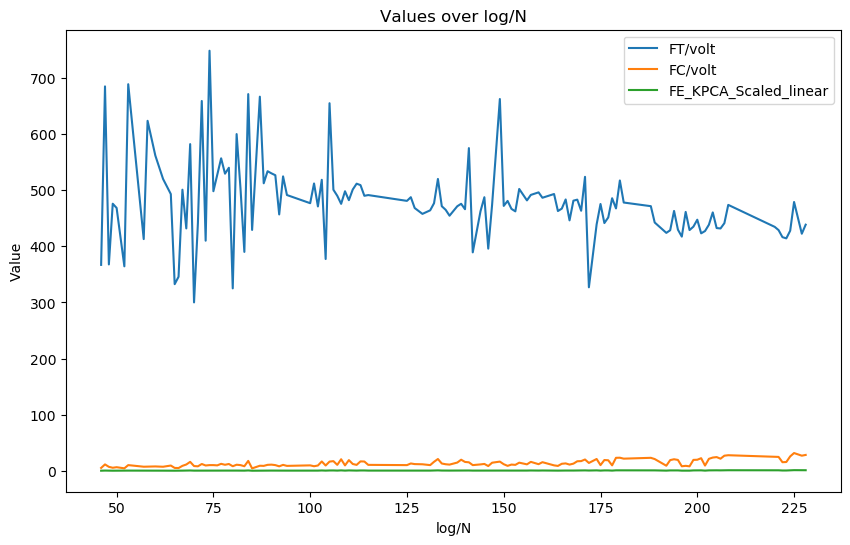

In [3]:
# Plot 'FT/volt', 'FC/volt' and 'FE_KPCA_Scaled_linear' values against 'log/N'
plt.figure(figsize=(10,6))
plt.plot(df['log/N'].values, df['FT/volt'].values, label='FT/volt')
plt.plot(df['log/N'].values, df['FC/volt'].values, label='FC/volt')
plt.plot(df['log/N'].values, df['FE_KPCA_Scaled_linear'].values, label='FE_KPCA_Scaled_linear')
plt.legend()
plt.title('Values over log/N')
plt.xlabel('log/N')
plt.ylabel('Value')
plt.show()


In [6]:
# Print first 5 values in 'FT/volt' column
print("First 5 values in 'FT/volt' column:")
print(df['FT/volt'].head(5).values)

# Print first 5 values in 'FC/volt' column
print("First 5 values in 'FC/volt' column:")
print(df['FC/volt'].head(5).values)

# Print first 5 values in 'FE_KPCA_Scaled_linear' column
print("First 5 values in 'FE_KPCA_Scaled_linear' column:")
print(df['FE_KPCA_Scaled_linear'].head(5).values)

First 5 values in 'FT/volt' column:
[366.875     685.        367.6923077 475.8823529 468.3333333]
First 5 values in 'FC/volt' column:
[ 5.         11.25        6.92307692  5.29411765  6.25      ]
First 5 values in 'FE_KPCA_Scaled_linear' column:
[0.03093388 0.25744819 0.10130915 0.04093601 0.07597227]


In [8]:
print(df.columns)

Index(['log/N', 'date', 'pilot', 'sq', 'remark', 'start', 'end', 'consum',
       'S/N', 'Arming',
       ...
       '76', '77', '78', '79', '80', 'FE_PCA_Scaled', 'FE_KPCA_Scaled_linear',
       'FE_KPCA_Scaled_poly', 'FE_KPCA_Scaled_rbf', 'FE_KPCA_Scaled_sigmoid'],
      dtype='object', length=107)


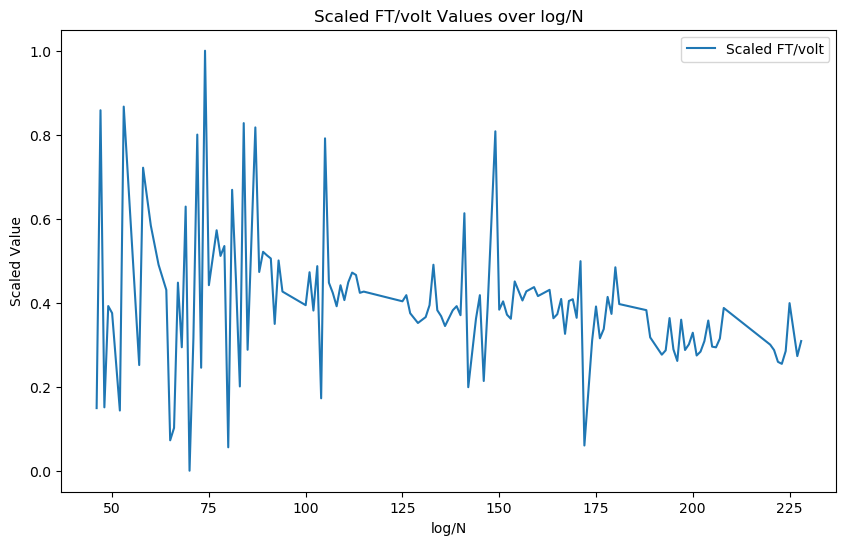

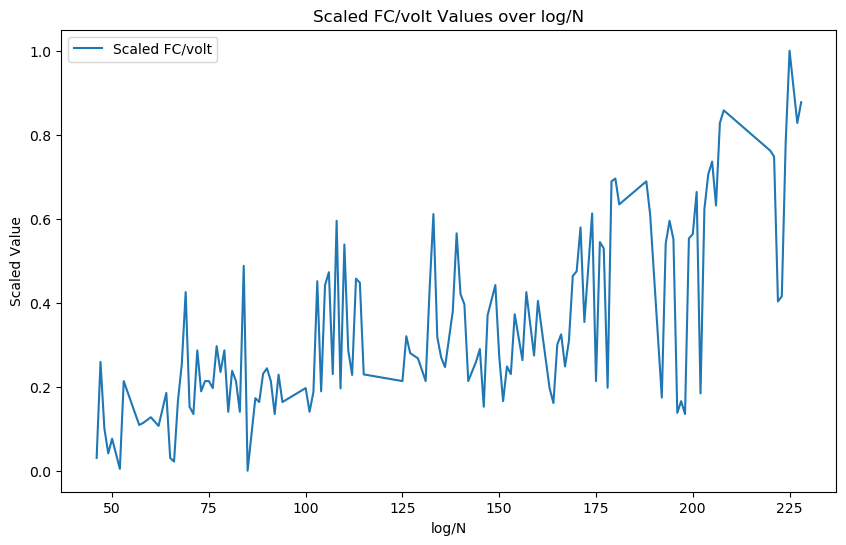

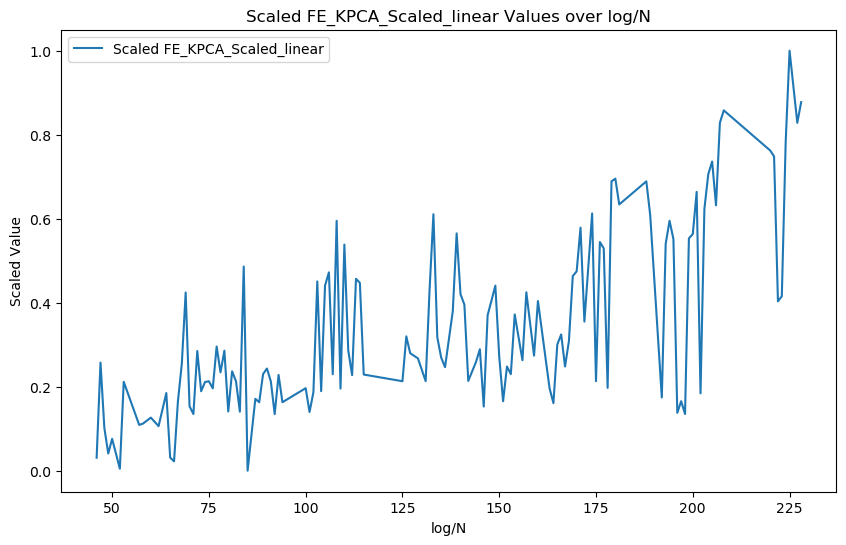

In [4]:
plt.figure(figsize=(10,6))
plt.plot(df['log/N'], MinMaxScaler().fit_transform(df[['FT/volt']]), label='Scaled FT/volt')
plt.title('Scaled FT/volt Values over log/N')
plt.xlabel('log/N')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['log/N'], MinMaxScaler().fit_transform(df[['FC/volt']]), label='Scaled FC/volt')
plt.title('Scaled FC/volt Values over log/N')
plt.xlabel('log/N')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['log/N'], MinMaxScaler().fit_transform(df[['FE_KPCA_Scaled_linear']]), label='Scaled FE_KPCA_Scaled_linear')
plt.title('Scaled FE_KPCA_Scaled_linear Values over log/N')
plt.xlabel('log/N')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()



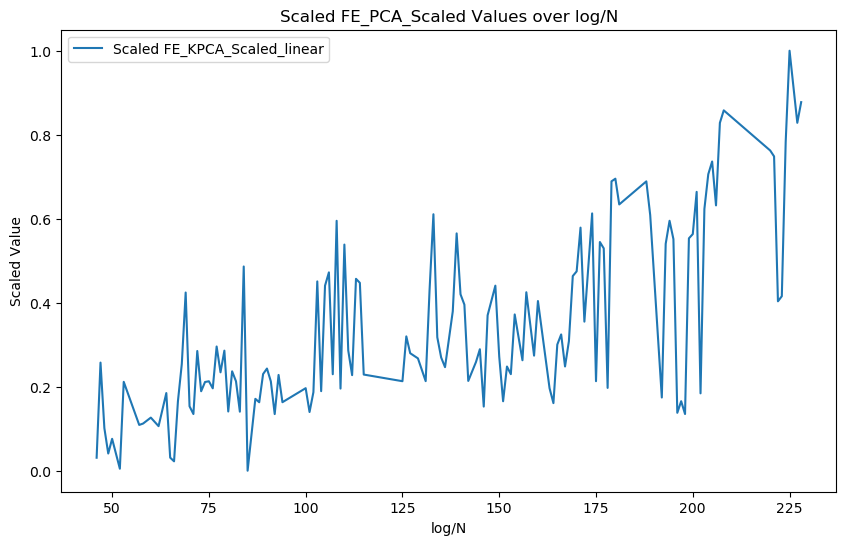

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df['log/N'], MinMaxScaler().fit_transform(df[['FE_PCA_Scaled']]), label='Scaled FE_KPCA_Scaled_linear')
plt.title('Scaled FE_PCA_Scaled Values over log/N')
plt.xlabel('log/N')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

Variance explained by PCA: [0.63541823]
Approximate variance explained by Kernel PCA with linear kernel: [1.]


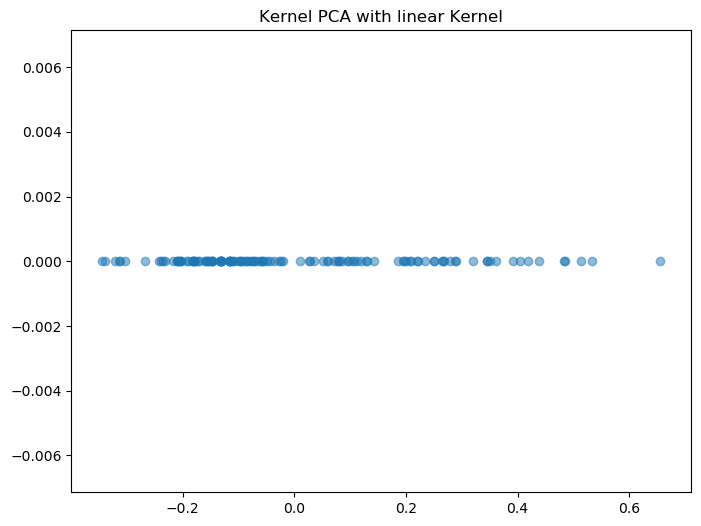

Approximate variance explained by Kernel PCA with poly kernel: [1.]


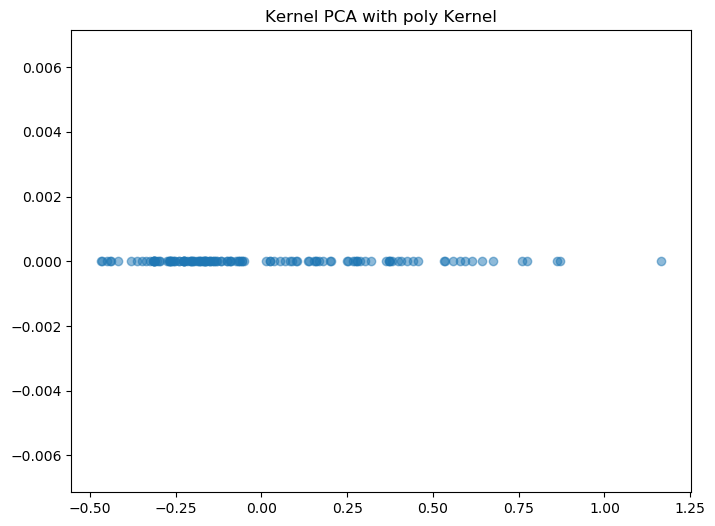

Approximate variance explained by Kernel PCA with rbf kernel: [1.]


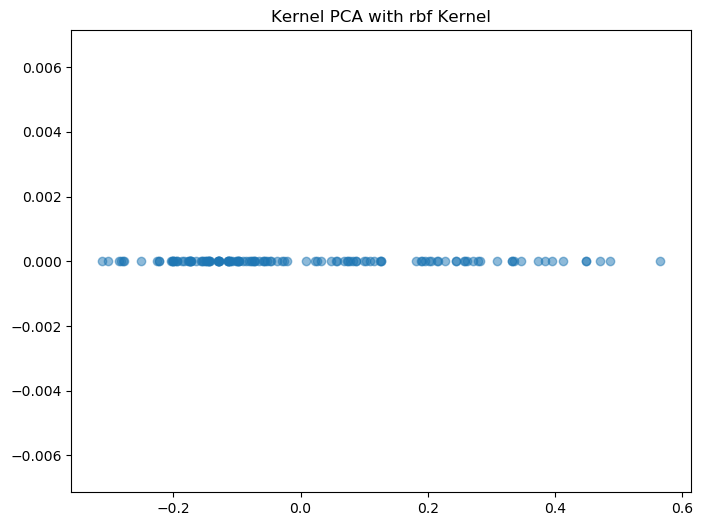

Approximate variance explained by Kernel PCA with sigmoid kernel: [1.]


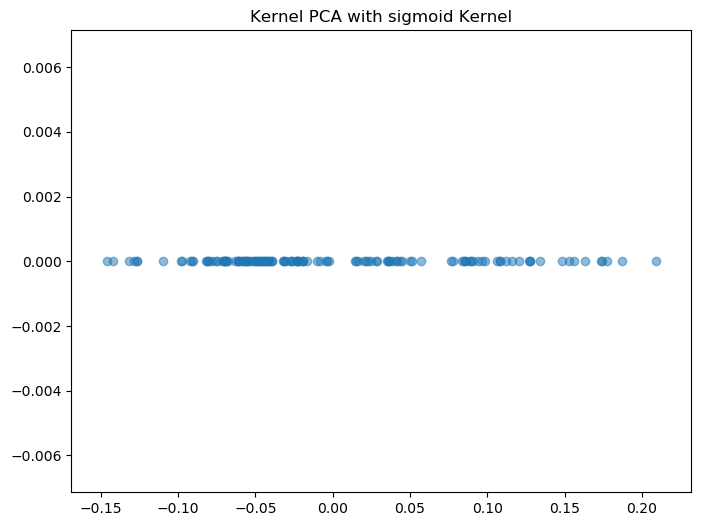

The Kernel PCA model with the highest approximate explained variance uses the linear kernel.


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# load the data
filename = 'D:/ATMRI/F450 case store/DASC/F450 flight test record-process_FE-3.csv'  # replace with your file name
df = pd.read_csv(filename)

# specify the features to use
features = ['FT/volt', 'FC/volt']  # replace with your actual column names

# scale the features to range 0-1
scaler = MinMaxScaler().fit(df[features])
scaled_features = scaler.transform(df[features])

# perform PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(scaled_features)
explained_variance_pca = pca.explained_variance_ratio_
print('Variance explained by PCA:', explained_variance_pca)

# save the first PC to the dataframe and write it back to the CSV
df['FE_PCA'] = pca_result
df.to_csv(filename, index=False)

# perform Kernel PCA with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
explained_variances_kpca = {}
for kernel in kernels:
    kpca = KernelPCA(n_components=1, kernel=kernel)
    kpca_result = kpca.fit_transform(scaled_features)
    
    # save the first PC to the dataframe and write it back to the CSV
    df['FE_KPCA_{}'.format(kernel)] = kpca_result
    df.to_csv(filename, index=False)
    
    # compute and store explained variance for Kernel PCA
    pca_temp = PCA(n_components=1).fit(kpca_result)
    explained_variance_kpca = pca_temp.explained_variance_ratio_
    explained_variances_kpca[kernel] = explained_variance_kpca
    print('Approximate variance explained by Kernel PCA with {} kernel: {}'.format(kernel, explained_variance_kpca))
    
    # plot the Kernel PCA result
    plt.figure(figsize=(8,6))
    plt.scatter(kpca_result, np.zeros_like(kpca_result), alpha=0.5)
    plt.title('Kernel PCA with {} Kernel'.format(kernel))
    plt.show()

# Find and print the kernel with the highest explained variance
best_kernel = max(explained_variances_kpca, key=explained_variances_kpca.get)
print('The Kernel PCA model with the highest approximate explained variance uses the {} kernel.'.format(best_kernel))


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

# load the data
filename = 'D:/ATMRI/F450 case store/DASC/F450 flight test record-process_FE-4.csv'  # replace with your file name
df = pd.read_csv(filename)

# specify the features to use
features = ['FT/volt', 'FC/volt']  # replace with your actual column names

# scale the features to range 0-1
scaler = MinMaxScaler().fit(df[features])
scaled_features = scaler.transform(df[features])

# perform PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(scaled_features)
explained_variance_pca = pca.explained_variance_ratio_
print('Variance explained by PCA:', explained_variance_pca)

# perform Kernel PCA with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    kpca = KernelPCA(n_components=1, kernel=kernel)
    kpca_result = kpca.fit_transform(scaled_features)
    
    # compute and store explained variance for Kernel PCA
    pca_temp = PCA(n_components=1).fit(kpca_result)
    explained_variance_kpca = pca_temp.explained_variance_ratio_
    print('Approximate variance explained by Kernel PCA with {} kernel: {}'.format(kernel, explained_variance_kpca))

# Perform t-SNE
tsne = TSNE(n_components=1, random_state=0)
tsne_result = tsne.fit_transform(scaled_features)

# Perform UMAP
umap_result = umap.UMAP(n_components=1, random_state=0).fit_transform(scaled_features)

# save the reduced dimension data to the dataframe and write it back to the CSV
df['PCA'] = MinMaxScaler().fit_transform(pca_result)
df['KPCA_linear'] = MinMaxScaler().fit_transform(kpca_result)
df['t-SNE'] = MinMaxScaler().fit_transform(tsne_result)
df['UMAP'] = MinMaxScaler().fit_transform(umap_result)

df.to_csv(filename, index=False)


Variance explained by PCA: [0.63541823]
Approximate variance explained by Kernel PCA with linear kernel: [1.]
Approximate variance explained by Kernel PCA with poly kernel: [1.]
Approximate variance explained by Kernel PCA with rbf kernel: [1.]
Approximate variance explained by Kernel PCA with sigmoid kernel: [1.]


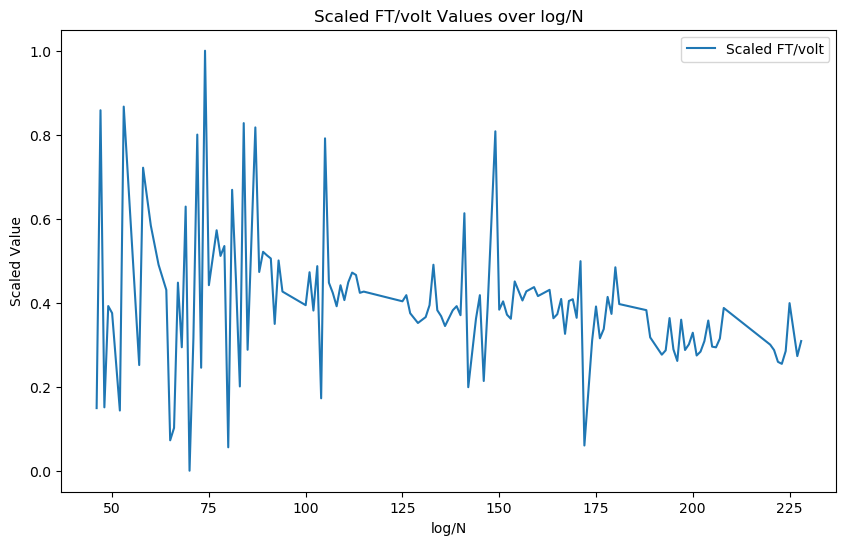

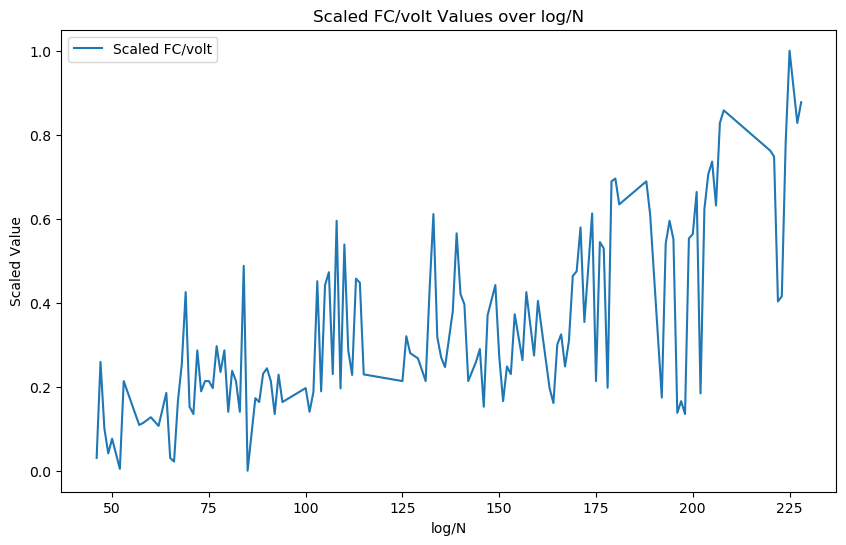

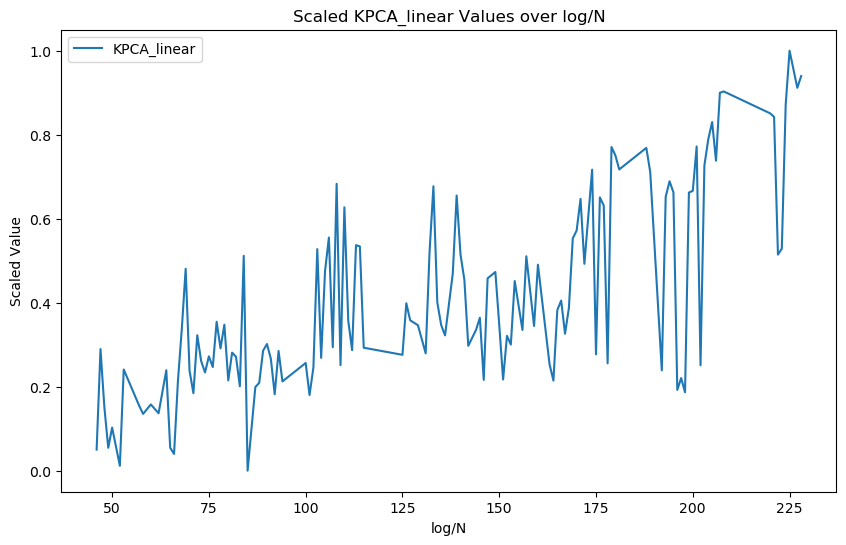

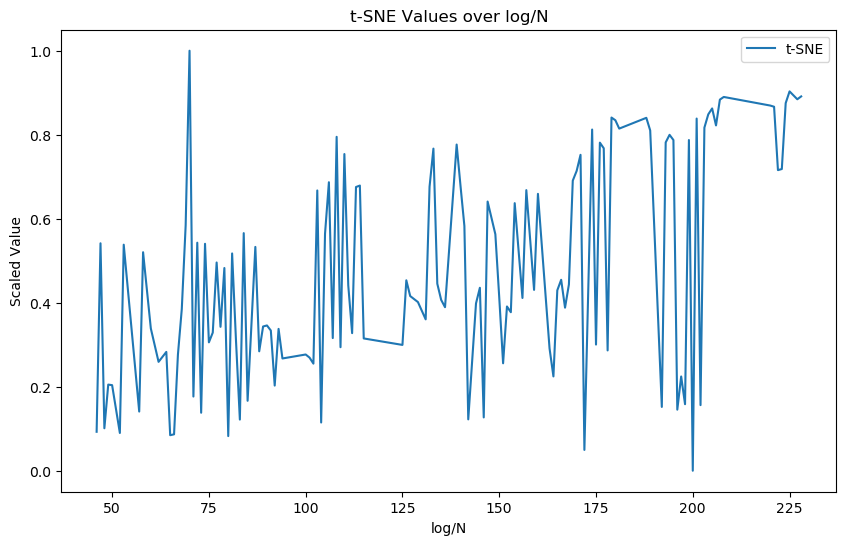

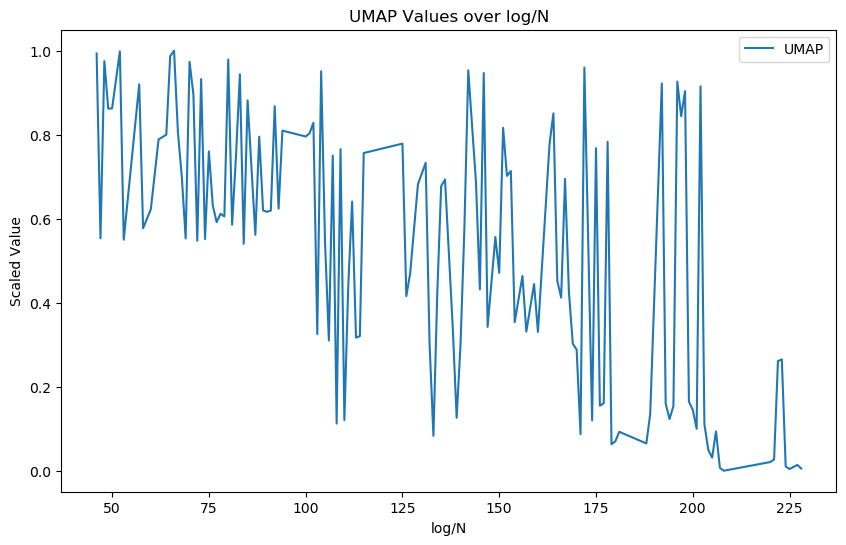

In [3]:
plt.figure(figsize=(10,6))
plt.plot(df['log/N'], MinMaxScaler().fit_transform(df[['FT/volt']]), label='Scaled FT/volt')
plt.title('Scaled FT/volt Values over log/N')
plt.xlabel('log/N')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['log/N'], MinMaxScaler().fit_transform(df[['FC/volt']]), label='Scaled FC/volt')
plt.title('Scaled FC/volt Values over log/N')
plt.xlabel('log/N')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['log/N'], MinMaxScaler().fit_transform(df[['KPCA_linear']]), label='KPCA_linear')
plt.title('Scaled KPCA_linear Values over log/N')
plt.xlabel('log/N')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['log/N'], MinMaxScaler().fit_transform(df[['t-SNE']]), label='t-SNE')
plt.title('t-SNE Values over log/N')
plt.xlabel('log/N')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['log/N'], MinMaxScaler().fit_transform(df[['UMAP']]), label='UMAP')
plt.title('UMAP Values over log/N')
plt.xlabel('log/N')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

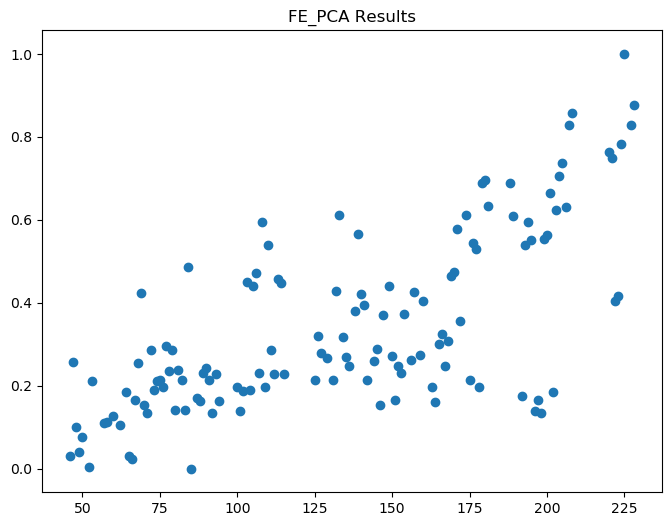

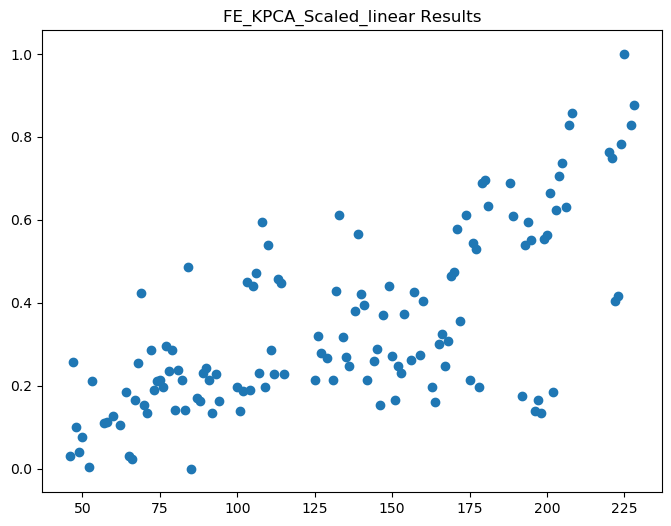

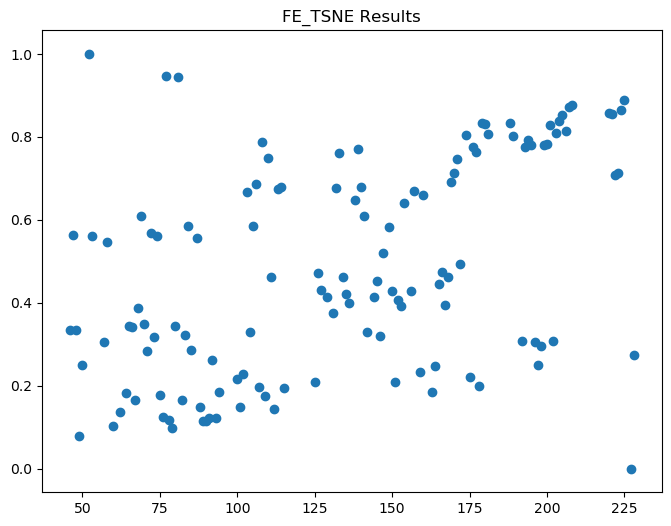

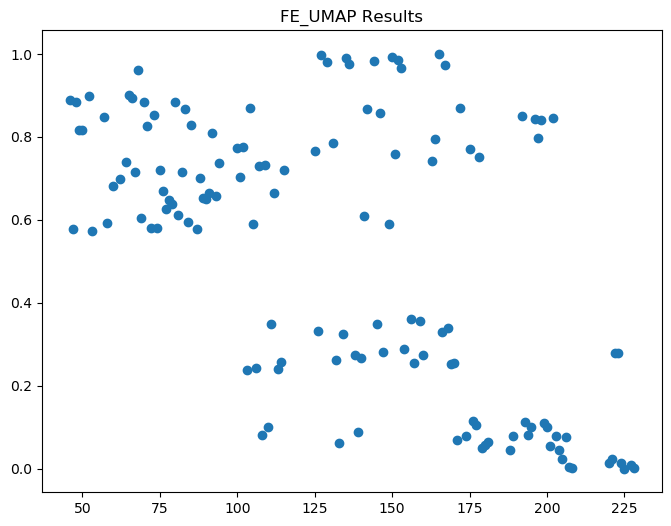

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# load the data
filename = 'D:/ATMRI/F450 case store/DASC/F450 flight test record-process_FE-5.csv'  # replace with your file name
df = pd.read_csv(filename)

# specify the features to use
features = ['FT/volt', 'FC/volt']  # replace with your actual column names

# scale the features to range 0-1
scaler = MinMaxScaler().fit(df[features])
scaled_features = scaler.transform(df[features])

# perform PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(scaled_features)
df['FE_PCA'] = MinMaxScaler().fit_transform(pca_result)

# perform Kernel PCA with linear kernel
kpca = KernelPCA(n_components=1, kernel='linear')
kpca_result = kpca.fit_transform(scaled_features)
df['FE_KPCA_Scaled_linear'] = MinMaxScaler().fit_transform(kpca_result)

# perform t-SNE
tsne = TSNE(n_components=1)
tsne_result = tsne.fit_transform(scaled_features)
df['FE_TSNE'] = MinMaxScaler().fit_transform(tsne_result)

# perform UMAP
umap = UMAP(n_components=1)
umap_result = umap.fit_transform(scaled_features)
df['FE_UMAP'] = MinMaxScaler().fit_transform(umap_result)

# save to CSV
df.to_csv(filename, index=False)

# Plot the results
for method in ['FE_PCA', 'FE_KPCA_Scaled_linear', 'FE_TSNE', 'FE_UMAP']:
    plt.figure(figsize=(8,6))
    plt.scatter(df['log/N'], df[method])
    plt.title(f'{method} Results')
    plt.show()


In [1]:
import pandas as pd

# load your csv file
df = pd.read_csv('D:/ATMRI/F450 case store/DASC/F450 flight test record-process_FE.csv')

# group by 'S/N' and calculate cumulative sum of 'length_sec'
df['length_indiv'] = df.groupby('S/N')['length_sec'].cumsum()

# save the result back to csv
df.to_csv('D:/ATMRI/F450 case store/DASC/F450 flight test record-process_FE.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import sqrt

# Specify the number of samples to use for training
num_samples = 20  # Adjust this number as needed

# load your dataset-a and dataset-b here
data_a = pd.read_csv('D:/ATMRI/F450 case store/DASC/F450 flight test record-process_FE.csv')
data_b = pd.read_csv('D:/ATMRI/F450 case store/DASC/vertical integrate/V_integ_actuator_outputs_2.csv')

# Join datasets on log/N and log fields
merged_data = data_a.merge(data_b, left_on='log/N', right_on='log')

# Select your inputs and target
inputs_b = merged_data[['output[0]', 'output[1]', 'output[2]', 'output[3]']].to_numpy()
target_a = merged_data['FE_KPCA'].to_numpy()

# Reduce your data for quick testing
inputs_b = inputs_b[:num_samples]
target_a = target_a[:num_samples]

# Preprocessing
scaler = MinMaxScaler()

# Fit scaler to your data
scaler.fit(inputs_b)

# Transform your data
inputs_b = scaler.transform(inputs_b)

# Split into train and test
inputs_b_train, inputs_b_test, target_a_train, target_a_test = train_test_split(inputs_b, target_a, test_size=0.2)

# Reshape inputs for LSTNet (samples, timesteps, features)
inputs_b_train = inputs_b_train.reshape((inputs_b_train.shape[0], inputs_b_train.shape[1], 1))
inputs_b_test = inputs_b_test.reshape((inputs_b_test.shape[0], inputs_b_test.shape[1], 1))

# Define and compile your model here...
model = ...  # Replace with your actual model definition and compilation

# Fit model
model.fit(inputs_b_train, target_a_train, epochs=50, batch_size=72, verbose=2, shuffle=False)

# Make predictions
predictions = model.predict(inputs_b_test)

# Evaluate model
mse = mean_squared_error(target_a_test, predictions)
mae = mean_absolute_error(target_a_test, predictions)
rmse = sqrt(mse)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')


In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Load the datasets
dataset_a = pd.read_csv('D:/ATMRI/F450 case store/F450 flight test record-process_FE.csv')
dataset_b = pd.read_csv('D:/ATMRI/F450 case store/V_integ_actuator_outputs_2-7.csv')

# Align the data based on the 'log' and 'log/N' columns
aligned_data = []
for _, row in dataset_a.iterrows():
    log_value = row['log/N']
    corresponding_rows = dataset_b[dataset_b['log'] == log_value]
    aligned_data.append(corresponding_rows)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the 'output[0]', 'output[1]', 'output[2]', and 'output[3]' columns in each aligned dataframe
for df in aligned_data:
    df[['output[0]', 'output[1]', 'output[2]', 'output[3]']] = scaler.fit_transform(df[['output[0]', 'output[1]', 'output[2]', 'output[3]']])

# Prepare the input and target data for the LSTNet model
x_train = [df[['output[0]', 'output[1]', 'output[2]', 'output[3]']].values for df in aligned_data[:10]]  # Take only the first 10 samples
y_train = dataset_a['FE_KPCA'].values[:10]  # Take only the first 10 targets

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(None, 4)))  # Input shape is (None, 4) to handle varying number of rows in each sample
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model on each sample separately
for x, y in zip(x_train, y_train):
    x = np.expand_dims(x, axis=0)  # Expand the dimensions of x to match the expected input shape of the model
    model.fit(x, np.array([y]), epochs=10, verbose=0)  # Train the model on the current sample

# Predict the 'FE_KPCA' values
predictions = [model.predict(np.expand_dims(x, axis=0))[0][0] for x in x_train]  # Predict the 'FE_KPCA' value for each sample and flatten the list

# Print MAE, RMSE, and MSE
print('MAE:', mean_absolute_error(y_train, predictions))
print('RMSE:', sqrt(mean_squared_error(y_train, predictions)))
print('MSE:', mean_squared_error(y_train, predictions))



Using TensorFlow backend.
C:\Users\65862\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\65862\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\65862\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\65862\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\65862\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\65862\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

C:\Users\65862\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\65862\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\65862\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

MAE: 0.06453788643052902
RMSE: 0.07787349746637384
MSE: 0.006064281607645333


In [ ]:
#make it more complex

C:\Users\jinlong.wang\AppData\Local\Temp\ipykernel_37912\1812781293.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['output[0]', 'output[1]', 'output[2]', 'output[3]']] = scaler.fit_transform(df[['output[0]', 'output[1]', 'output[2]', 'output[3]']])
C:\Users\jinlong.wang\AppData\Local\Temp\ipykernel_37912\1812781293.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['output[0]', 'output[1]', 'output[2]', 'output[3]']] = scaler.fit_transform(df[['output[0]', 'output[1]', 'output[2]', 'output[3

1/1 [==============================] - 1s 982ms/step
MAE: 0.06506801163127747
RMSE: 0.07816921797286669
MSE: 0.006110426638489545


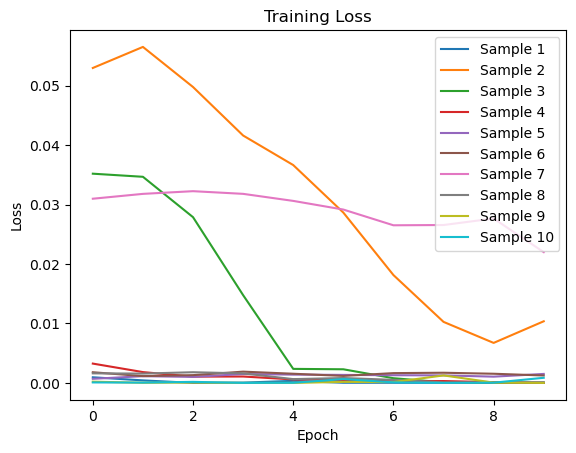

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the datasets
dataset_a = pd.read_csv('D:/ATMRI/flight test data/F450 test full log record-effective/F450 flight test record-process_FE.csv')
dataset_b = pd.read_csv('D:/ATMRI/flight test data/F450 test full log record-effective/V_integ_actuator_outputs_2-7.csv')

# Align the data based on the 'log' and 'log/N' columns
aligned_data = []
for _, row in dataset_a.iterrows():
    log_value = row['log/N']
    corresponding_rows = dataset_b[dataset_b['log'] == log_value]
    aligned_data.append(corresponding_rows)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the 'output[0]', 'output[1]', 'output[2]', and 'output[3]' columns in each aligned dataframe
for df in aligned_data:
    df[['output[0]', 'output[1]', 'output[2]', 'output[3]']] = scaler.fit_transform(df[['output[0]', 'output[1]', 'output[2]', 'output[3]']])

# Prepare the input and target data for the LSTNet model
x_train = [df[['output[0]', 'output[1]', 'output[2]', 'output[3]']].values for df in aligned_data[:10]]  # Take only the first 10 samples
y_train = dataset_a['FE_KPCA'].values[:10]  # Take only the first 10 targets

# Define a more complex LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(None, 4)))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model and save the history
history = []
for x, y in zip(x_train, y_train):
    x = np.expand_dims(x, axis=0)  # Expand the dimensions of x to match the expected input shape of the model
    history.append(model.fit(x, np.array([y]), epochs=10, verbose=0))  # Train the model on the current sample


# Predict the 'FE_KPCA' values
predictions = [model.predict(np.expand_dims(x, axis=0))[0][0] for x in x_train]  # Predict the 'FE_KPCA' value for each sample and flatten the list

# Print MAE, RMSE, and MSE
print('MAE:', mean_absolute_error(y_train, predictions))
print('RMSE:', sqrt(mean_squared_error(y_train, predictions)))
print('MSE:', mean_squared_error(y_train, predictions))

# Plot the training loss for each sample
for i, h in enumerate(history):
    plt.plot(h.history['loss'], label=f'Sample {i+1}')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()